In [143]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from collections import Counter

In [144]:
#Load Dataset
df = pd.read_csv("pcos_prediction_dataset.csv")


In [145]:
df.head()

Country  Age          BMI Menstrual Regularity Hirsutism Acne Severity  \
0  Madagascar   26   Overweight              Regular       Yes        Severe   
1     Vietnam   16  Underweight              Regular       Yes           NaN   
2     Somalia   41       Normal              Regular        No      Moderate   
3      Malawi   27       Normal            Irregular        No          Mild   
4      France   26   Overweight            Irregular       Yes           NaN   

  Family History of PCOS Insulin Resistance  Lifestyle Score Stress Levels  \
0                    Yes                Yes                2           Low   
1                     No                Yes                4          High   
2                     No                 No                7        Medium   
3                     No                 No               10           Low   
4                     No                 No                7        Medium   

  Urban/Rural Socioeconomic Status Awareness of PCOS Fertility Concerns  \
0       Rural                 High               Yes                 No   
1       Rural               Middle               Yes                 No   
2       Urban               Middle               Yes                Yes   
3       Urban                 High               Yes                 No   
4       Urban               Middle                No                 No   

   Undiagnosed PCOS Likelihood  Ethnicity Diagnosis  
0                     0.107938   Hispanic       Yes  
1                     0.156729      Other        No  
2                     0.202901      Other        No  
3                     0.073926  Caucasian       Yes  
4                     0.229266  Caucasian        No

# Understanding the data

In [147]:
df.shape

(120000, 17)

In [148]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [149]:
# Summary statistics
df.describe()

Age  Lifestyle Score  Undiagnosed PCOS Likelihood
count  120000.000000    120000.000000                120000.000000
mean       31.980508         5.506567                     0.149937
std        10.096799         2.871052                     0.057786
min        15.000000         1.000000                     0.050001
25%        23.000000         3.000000                     0.099820
50%        32.000000         6.000000                     0.149844
75%        41.000000         8.000000                     0.200061
max        49.000000        10.000000                     0.249998

In [150]:
#data type of each column
df.dtypes

Country                         object
Age                              int64
BMI                             object
Menstrual Regularity            object
Hirsutism                       object
Acne Severity                   object
Family History of PCOS          object
Insulin Resistance              object
Lifestyle Score                  int64
Stress Levels                   object
Urban/Rural                     object
Socioeconomic Status            object
Awareness of PCOS               object
Fertility Concerns              object
Undiagnosed PCOS Likelihood    float64
Ethnicity                       object
Diagnosis                       object
dtype: object

In [151]:
# names of the columns 
df.columns 

Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

# Data cleaning and Preprocessing

In [153]:
# Checking for missing values
df.isnull().sum()

Country                            0
Age                                0
BMI                                0
Menstrual Regularity               0
Hirsutism                          0
Acne Severity                  60085
Family History of PCOS             0
Insulin Resistance                 0
Lifestyle Score                    0
Stress Levels                      0
Urban/Rural                        0
Socioeconomic Status               0
Awareness of PCOS                  0
Fertility Concerns                 0
Undiagnosed PCOS Likelihood        0
Ethnicity                          0
Diagnosis                          0
dtype: int64

In [154]:
#Filled the missing values with mode
df['Acne Severity'] = df['Acne Severity'].fillna(df['Acne Severity'].mode()[0])

In [155]:
df.isnull().sum()

Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64

In [156]:
df.duplicated().sum()     #No duplicate values

0

# Encoding the neccessary columns

In [158]:
# Encoding Binary Variables
binary_columns = ['Menstrual Regularity', 'Hirsutism', 'Family History of PCOS', 'Insulin Resistance', 'Urban/Rural', 'Diagnosis']
for col in binary_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [159]:
# One-Hot Encoding for Multi-Class Variables
df = pd.get_dummies(df, columns=['BMI', 'Socioeconomic Status', 'Ethnicity'], drop_first=True)


In [160]:
#Label Encode Remaining Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [161]:
print("✅ Encoding Completed!\n", df.head())


✅ Encoding Completed!
    Country  Age  Menstrual Regularity  Hirsutism  Acne Severity  \
0       34   26                     1          1              2   
1       73   16                     1          1              0   
2       56   41                     1          0              1   
3       35   27                     0          0              0   
4       20   26                     0          1              0   

   Family History of PCOS  Insulin Resistance  Lifestyle Score  Stress Levels  \
0                       1                   1                2              1   
1                       0                   1                4              0   
2                       0                   0                7              2   
3                       0                   0               10              1   
4                       0                   0                7              2   

   Urban/Rural  ...  Diagnosis  BMI_Obese  BMI_Overweight  BMI_Underweight  \
0        

In [162]:
# Step 6: Normalize Numeric Columns
scaler = MinMaxScaler()
numeric_columns = ['Lifestyle Score', 'Stress Levels', 'Undiagnosed PCOS Likelihood']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [163]:
# Step 7: Convert Boolean Columns to Integers
boolean_columns = df.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    df[col] = df[col].astype(int)

In [164]:
print("✅ Data Preprocessing Completed!\n", df.head())

✅ Data Preprocessing Completed!
    Country  Age  Menstrual Regularity  Hirsutism  Acne Severity  \
0       34   26                     1          1              2   
1       73   16                     1          1              0   
2       56   41                     1          0              1   
3       35   27                     0          0              0   
4       20   26                     0          1              0   

   Family History of PCOS  Insulin Resistance  Lifestyle Score  Stress Levels  \
0                       1                   1         0.111111            0.5   
1                       0                   1         0.333333            0.0   
2                       0                   0         0.666667            1.0   
3                       0                   0         1.000000            0.5   
4                       0                   0         0.666667            1.0   

   Urban/Rural  ...  Diagnosis  BMI_Obese  BMI_Overweight  BMI_Underweight  \

# Exploratory Data Analysis (EDA)

In [166]:
#  Age Distribution 
fig = px.histogram(df, x='Age', marginal='box', color_discrete_sequence=['green'],  
                 title='Age Distribution')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', title_font=dict(size=20),  # Larger title
                  font=dict(family="Arial, sans-serif", size=14))  # Nicer font
fig.update_layout(bargap=0.1)  # Adjust gap between bars
fig.show()

In [167]:
# Menstrual Regularity
labels = df['Menstrual Regularity'].value_counts().index
values = df['Menstrual Regularity'].value_counts().values
fig = px.pie(names=labels, values=values, title='Menstrual Regularity')
fig.show()


# From the plot it can be observed that 70% of the individuals have regular menstrual cycles, while 30% have irregular menstrual cycles.
The data is highly imbalanced

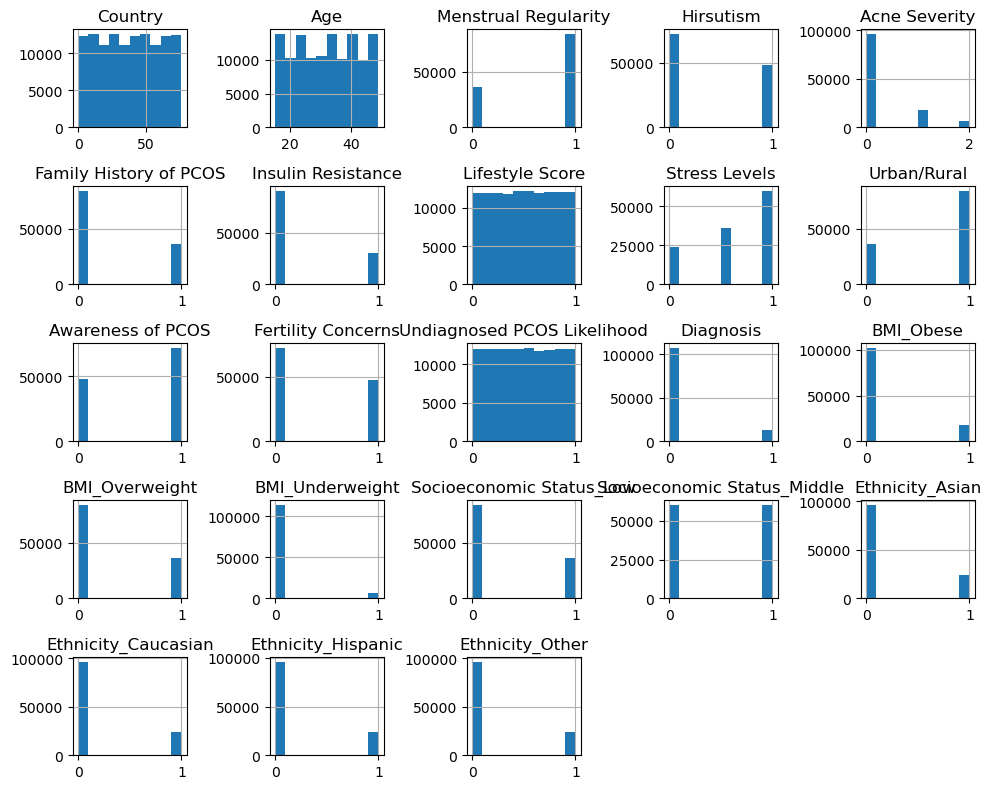

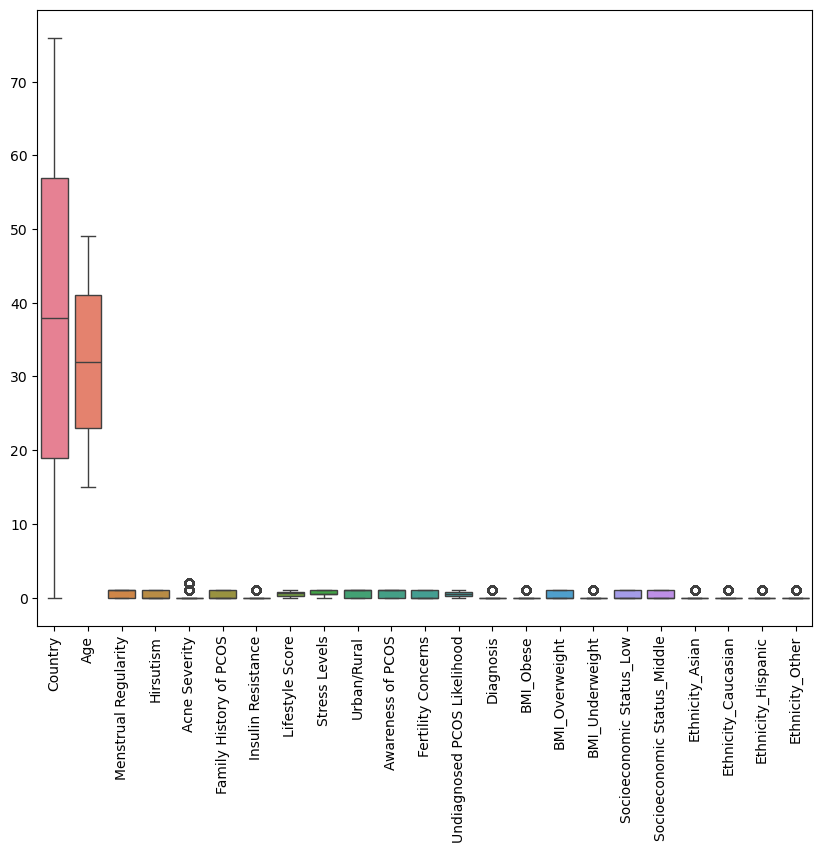

In [169]:
# Histogram for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()

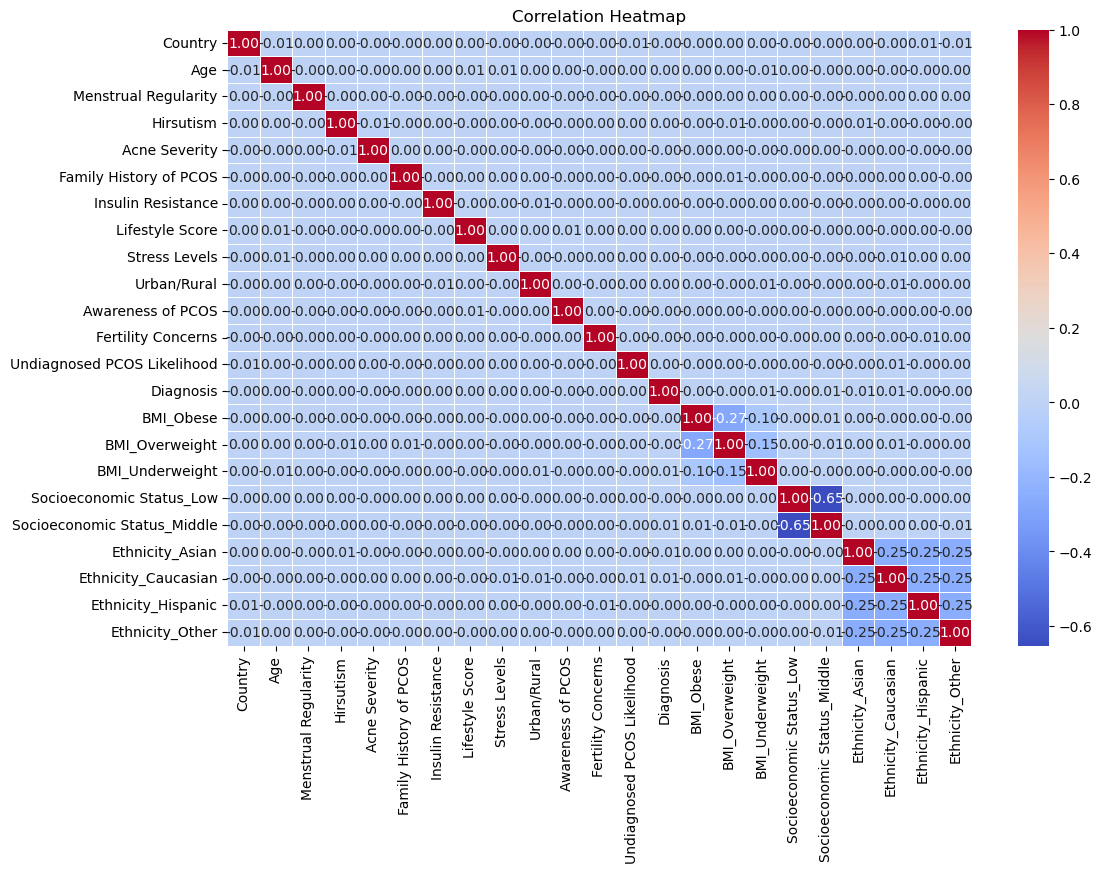

In [170]:
# Correlation matrix
corr = df[numeric_columns].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

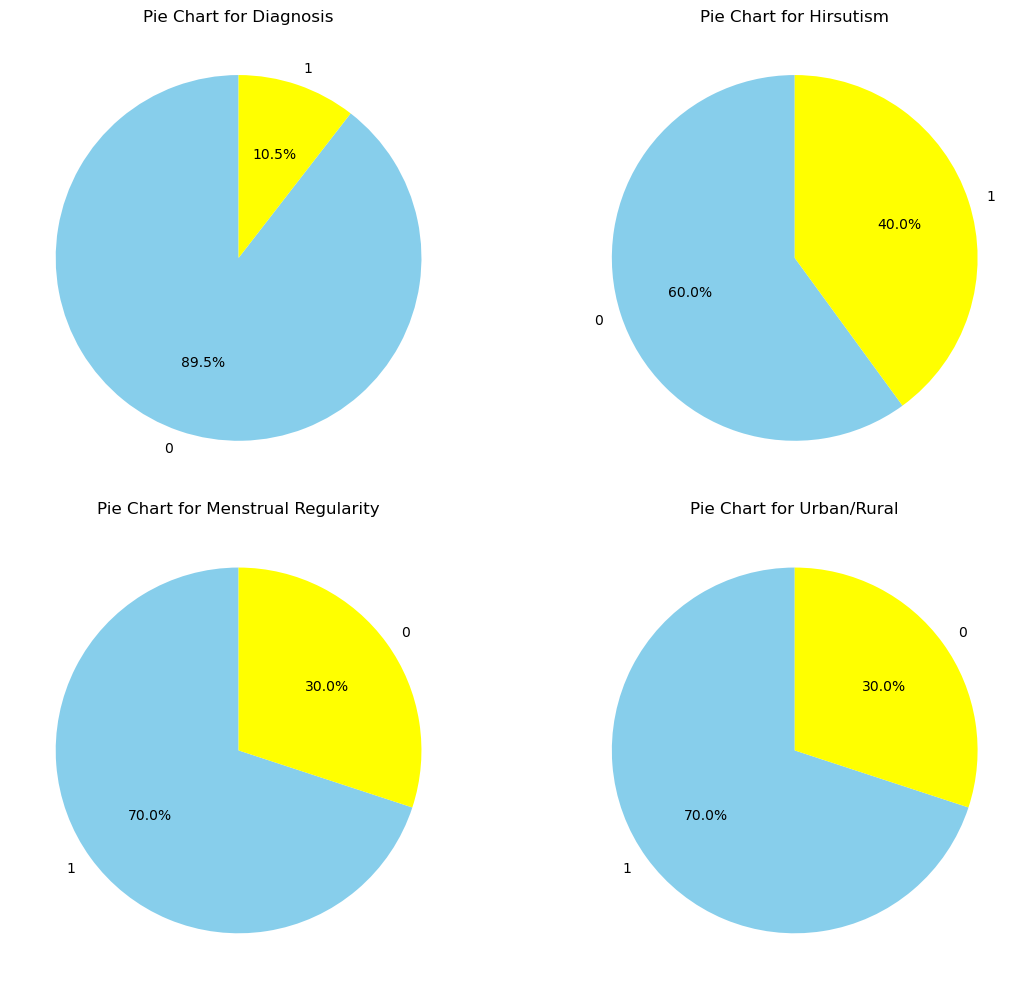

In [171]:
# List of categorical columns for which we want to create pie charts
categorical_columns = ['Diagnosis', 'Hirsutism', 'Menstrual Regularity', 'Urban/Rural']

# pie charts for each categorical column
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns for subplot grid
    # Count the occurrences of each category in the column
    category_counts = df[col].value_counts()
    # Create pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'yellow', 'lightcoral', 'lightsalmon'])
    plt.title(f'Pie Chart for {col}')

plt.tight_layout()
plt.show()

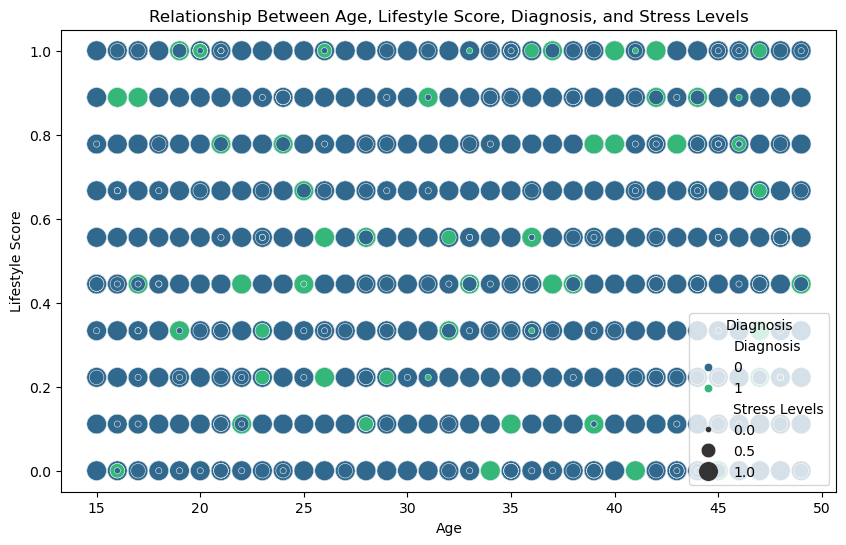

In [172]:
# Multivariate scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Lifestyle Score', hue='Diagnosis', size='Stress Levels', palette='viridis', sizes=(20, 200))
plt.title('Relationship Between Age, Lifestyle Score, Diagnosis, and Stress Levels')
plt.xlabel('Age')
plt.ylabel('Lifestyle Score')
plt.legend(title='Diagnosis')
plt.show()

Urban/Rural      0      1
Diagnosis                
0            32296  75109
1             3761   8834


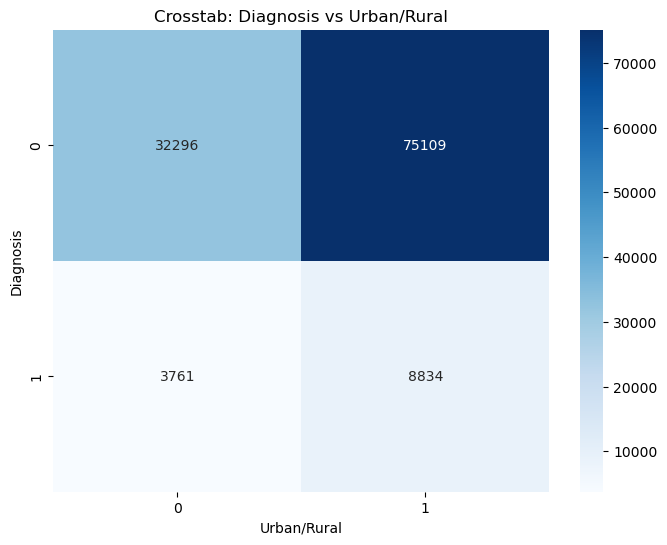

In [173]:
# Crosstab analysis for two categorical columns
crosstab_result = pd.crosstab(df['Diagnosis'], df['Urban/Rural'])
print(crosstab_result)

# Visualize the crosstab using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_result, annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab: Diagnosis vs Urban/Rural')
plt.xlabel('Urban/Rural')
plt.ylabel('Diagnosis')
plt.show()

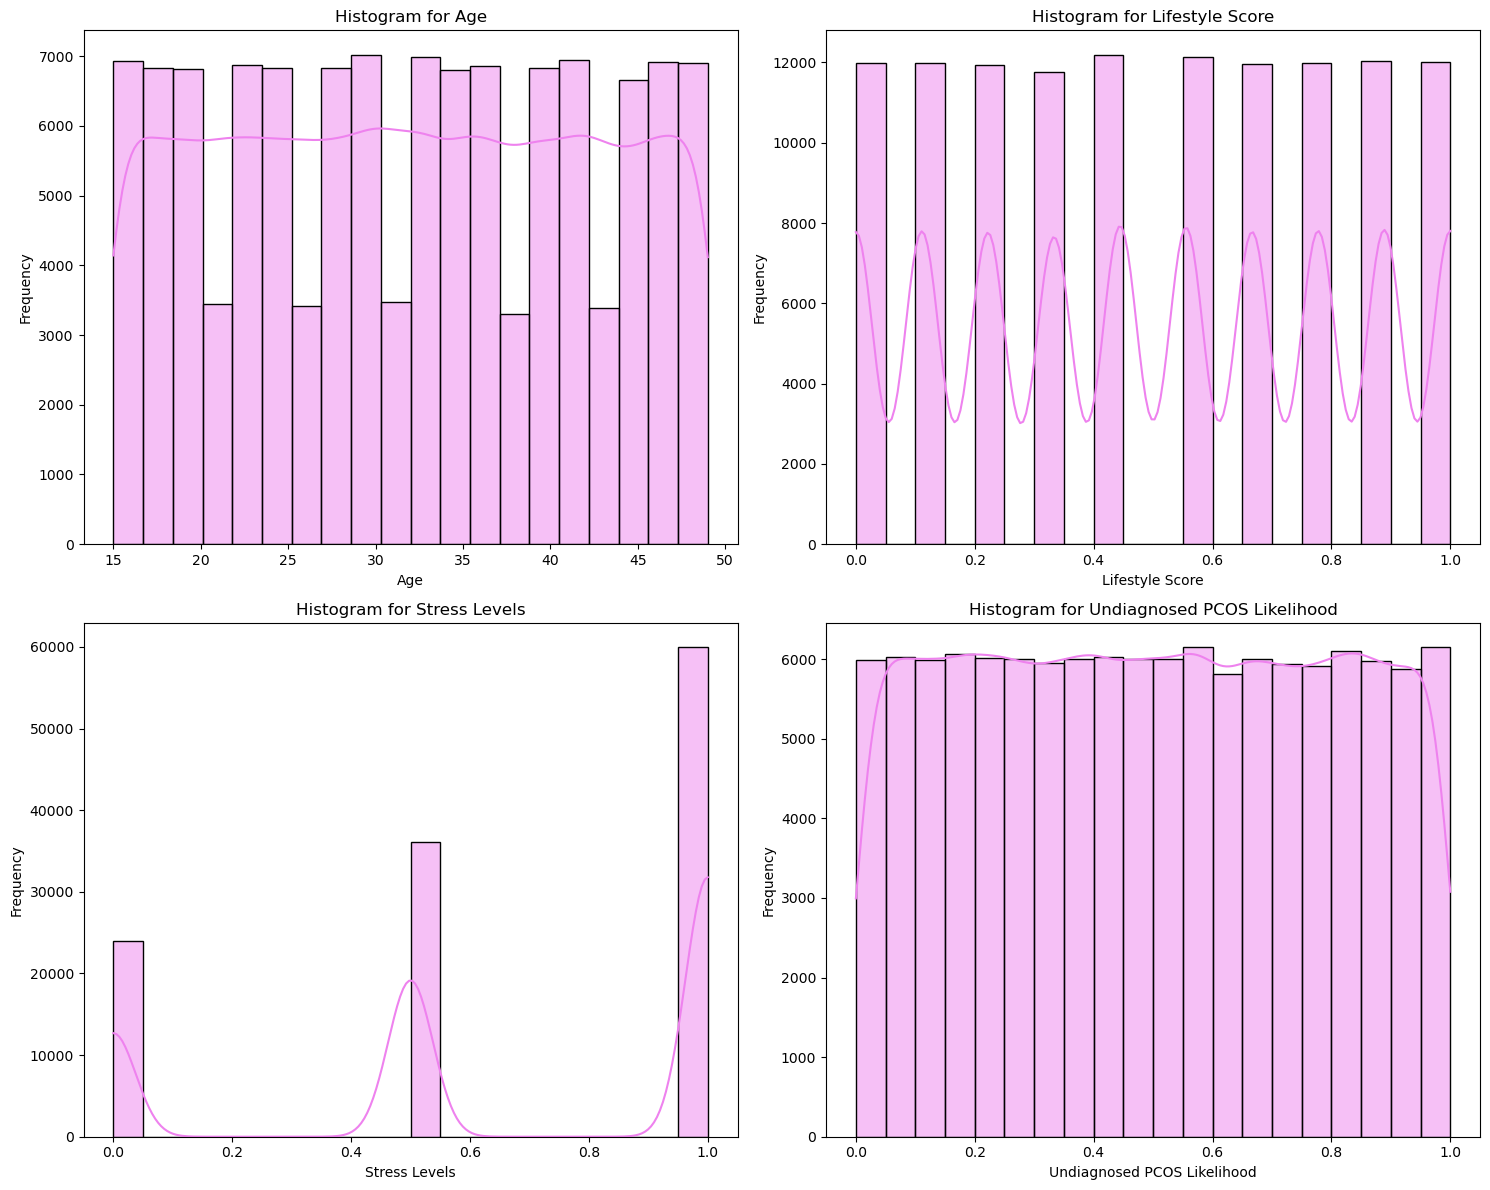

In [174]:
numerical_columns = [
    'Age', 'Lifestyle Score', 'Stress Levels', 'Undiagnosed PCOS Likelihood'
]

# Generate histograms for each numerical column
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns for subplot grid
    sns.histplot(df[col], kde=True, bins=20, color='violet')  # histplot with KDE for smooth distribution
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

# Fixing imbalanced dataset using SMOTE

# Test-train split

In [307]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Keep only important features
important_features = ['Country', 'Age', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity',
                      'Family History of PCOS', 'Insulin Resistance', 'Lifestyle Score',
                      'Stress Levels', 'Urban/Rural', 'Awareness of PCOS',
                      'Fertility Concerns', 'Undiagnosed PCOS Likelihood', 'BMI_Obese',
                      'BMI_Overweight', 'Socioeconomic Status_Low',
                      'Socioeconomic Status_Middle', 'Ethnicity_Asian', 'Ethnicity_Caucasian',
                      'Ethnicity_Hispanic', 'Ethnicity_Other']

# Select only important features
X = df[important_features]
y = df['Diagnosis']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("y_train distribution before SMOTE:", Counter(y_train))
print("y_test distribution:", Counter(y_test))


y_train distribution before SMOTE: Counter({0: 85924, 1: 10076})
y_test distribution: Counter({0: 21481, 1: 2519})


# Fixing imbalanced dataset using SMOTE

In [309]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE Applied: Class Distribution After Resampling", Counter(y_train_resampled))


SMOTE Applied: Class Distribution After Resampling Counter({0: 85924, 1: 85924})


In [311]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Only transform, do NOT fit again!


In [313]:
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate_model(model):
    model.fit(X_train_resampled, y_train_resampled)  # Train on balanced data
    y_pred = model.predict(X_test)  # Predict on test data

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    return accuracy, report  # ✅ Only return values, no print


In [182]:
from sklearn.linear_model import LogisticRegression 

# Logistic Regression

In [321]:
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000, C=0.5)
accuracy, report = train_and_evaluate_model(lr_model)
print("\n🔹 Optimized Logistic Regression Accuracy:", accuracy)
print(report)


🔹 Optimized Logistic Regression Accuracy: 0.704875
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     21481
           1       0.11      0.25      0.15      2519

    accuracy                           0.70     24000
   macro avg       0.50      0.50      0.49     24000
weighted avg       0.81      0.70      0.75     24000



# DecisionTree

In [325]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
accuracy, report = train_and_evaluate_model(dt_model)
print("\n🔹 Decision Tree Accuracy:", accuracy)
print(report)


🔹 Decision Tree Accuracy: 0.8950416666666666
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.00      0.00      0.00      2519

    accuracy                           0.90     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.90      0.85     24000



# Random Forest

In [327]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
accuracy, report = train_and_evaluate_model(rf_model)
print("\n🔹 Random Forest Accuracy:", accuracy)
print(report)


🔹 Random Forest Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     21481
           1       0.11      0.05      0.07      2519

    accuracy                           0.85     24000
   macro avg       0.50      0.50      0.50     24000
weighted avg       0.81      0.85      0.83     24000



In [189]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

# SGDClassifier

In [329]:
svm_model = SGDClassifier(loss="hinge", alpha=0.00001, max_iter=2000, tol=1e-4, n_jobs=-1)
accuracy, report = train_and_evaluate_model(svm_model)
print("\n🔹 Optimized SVM (SGD) Accuracy:", accuracy)
print(report)


🔹 Optimized SVM (SGD) Accuracy: 0.7177083333333333
              precision    recall  f1-score   support

           0       0.90      0.78      0.83     21481
           1       0.11      0.23      0.14      2519

    accuracy                           0.72     24000
   macro avg       0.50      0.50      0.49     24000
weighted avg       0.81      0.72      0.76     24000



# (KNN) algorithm

In [331]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=-1)
accuracy, report = train_and_evaluate_model(knn_model)
print("\n🔹 Optimized KNN Accuracy:", accuracy)
print(report)


🔹 Optimized KNN Accuracy: 0.674125
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     21481
           1       0.11      0.28      0.15      2519

    accuracy                           0.67     24000
   macro avg       0.50      0.50      0.48     24000
weighted avg       0.81      0.67      0.73     24000



# #Naive Bayes

In [333]:
nb_model = GaussianNB()
accuracy, report = train_and_evaluate_model(nb_model)
print("\n🔹 Naive Bayes Accuracy:", accuracy)
print(report)


🔹 Naive Bayes Accuracy: 0.6742916666666666
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     21481
           1       0.11      0.29      0.16      2519

    accuracy                           0.67     24000
   macro avg       0.50      0.50      0.48     24000
weighted avg       0.81      0.67      0.73     24000



# Multi-Layer Perceptron

In [335]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, solver='adam', activation='relu', alpha=0.001)
accuracy, report = train_and_evaluate_model(mlp_model)
print("\n🔹 Optimized MLP Accuracy:", accuracy)
print(report)


🔹 Optimized MLP Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     21481
           1       0.11      0.13      0.12      2519

    accuracy                           0.80     24000
   macro avg       0.50      0.50      0.50     24000
weighted avg       0.81      0.80      0.81     24000



# XGBoost

In [339]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", eval_metric="logloss",
    n_estimators=150, max_depth=6, learning_rate=0.05, n_jobs=-1
)
accuracy, report = train_and_evaluate_model(xgb_model)
print("\n🔹 Optimized XGBoost Accuracy:", accuracy)
print(report)


🔹 Optimized XGBoost Accuracy: 0.8916666666666667
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.12      0.01      0.01      2519

    accuracy                           0.89     24000
   macro avg       0.51      0.50      0.48     24000
weighted avg       0.81      0.89      0.84     24000



# LightGBM

In [341]:
lgbm_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', 
                                n_estimators=150, learning_rate=0.05, max_depth=7, n_jobs=-1)
accuracy, report = train_and_evaluate_model(lgbm_model)
print("\n🔹 Optimized LightGBM Accuracy:", accuracy)
print(report)

[LightGBM] [Info] Number of positive: 85924, number of negative: 85924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 171848, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🔹 Optimized LightGBM Accuracy: 0.894625
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.22      0.00      0.00      2519

    accuracy                           0.89     24000
   macro avg       0.56      0.50      0.47     24000
weighted avg       0.82      0.89      0.85     24000



# COMBINING ALL MODELS TO GET THE BEST ACCURACY
# Meta-Model

In [343]:
from sklearn.ensemble import StackingClassifier

# Optimized Stacking Ensemble
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, class_weight="balanced", random_state=42)),
        ('sgd_svm', SGDClassifier(loss="hinge", alpha=0.00001, max_iter=2000, tol=1e-4, n_jobs=-1)),
        ('knn', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=-1)),
        ('nb', GaussianNB()),
        ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, solver='adam', activation='relu', alpha=0.001)),
        ('xgb', xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", n_estimators=150, max_depth=6, learning_rate=0.05, n_jobs=-1)),
        ('lgbm', lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', n_estimators=150, learning_rate=0.05, max_depth=7, n_jobs=-1)),
        ('lr', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000, C=0.5))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42),  # Changed from LogisticRegression to RF for better performance
    n_jobs=-1
)

# Train and Evaluate Stacking Model
accuracy, report = train_and_evaluate_model(stacking_model)
print("\n🔹 Stacking Ensemble Model Accuracy:", accuracy)
print(report)



🔹 Stacking Ensemble Model Accuracy: 0.8887083333333333
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     21481
           1       0.11      0.01      0.02      2519

    accuracy                           0.89     24000
   macro avg       0.50      0.50      0.48     24000
weighted avg       0.81      0.89      0.84     24000



# Created Confusion Matrix grapgh for all models to see their prediction visually

In [205]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No PCOS', 'PCOS'],
                yticklabels=['No PCOS', 'PCOS'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

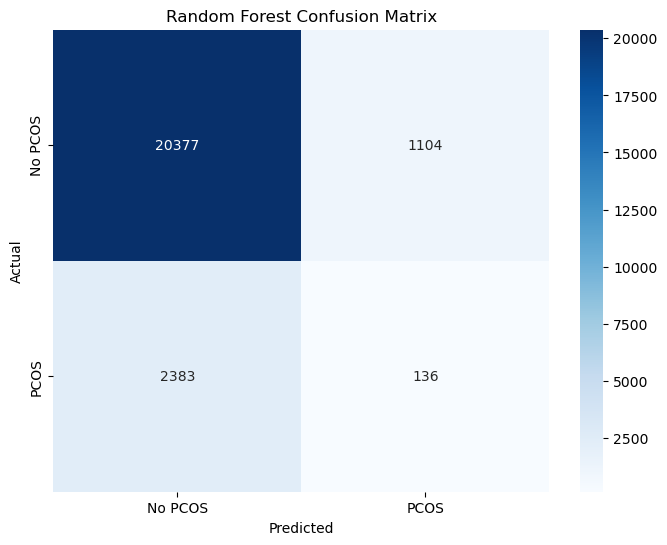

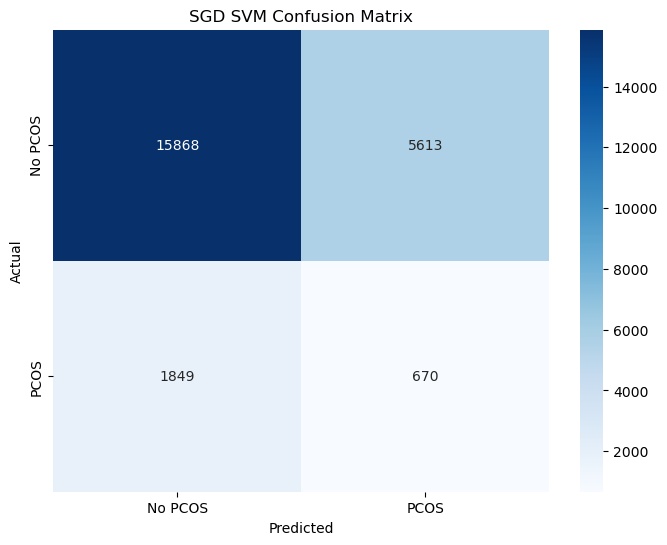

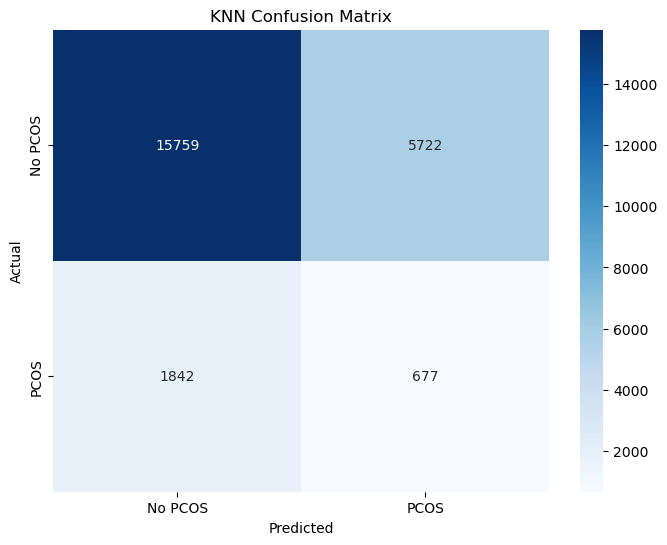

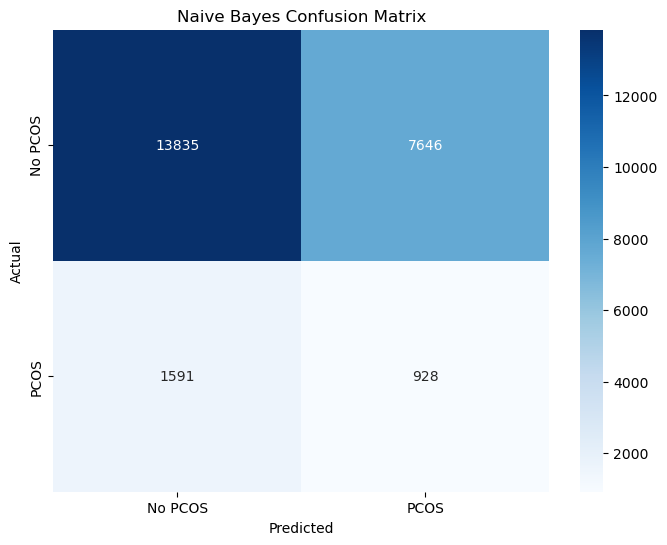

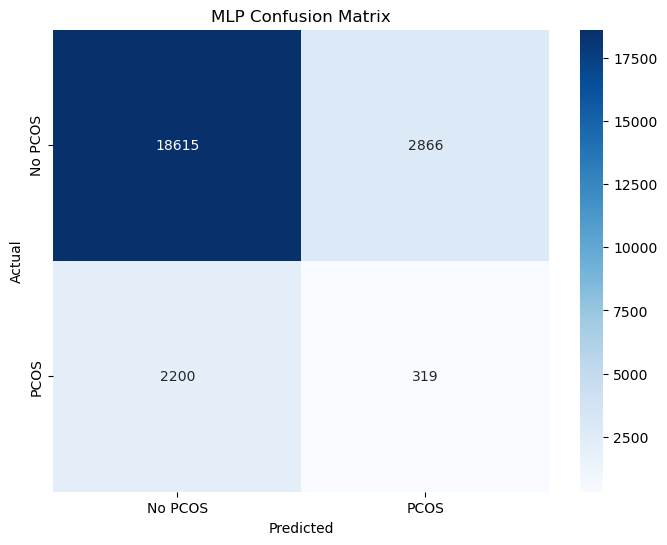

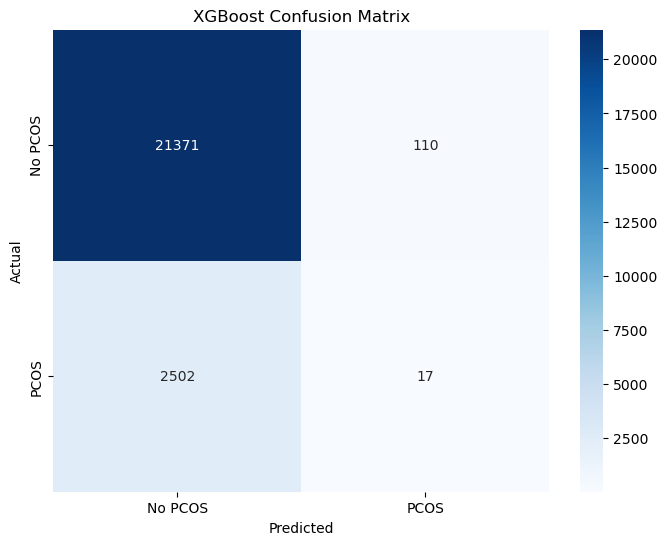

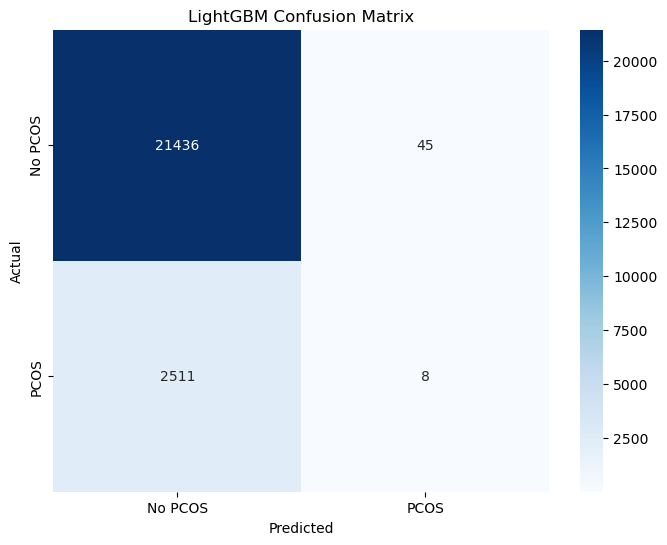

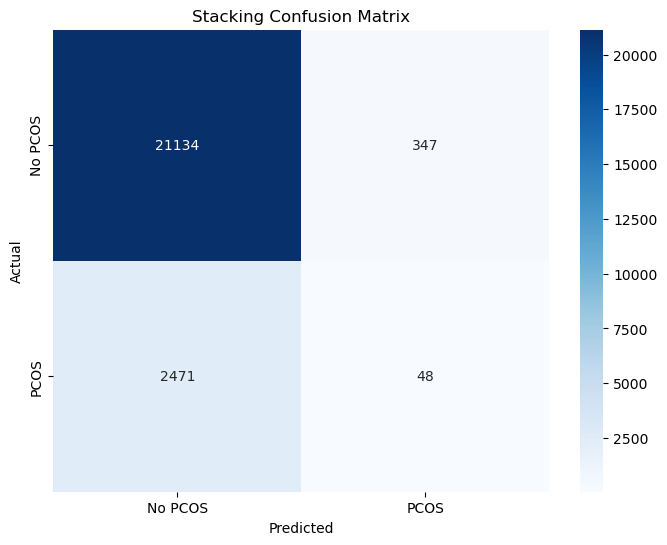

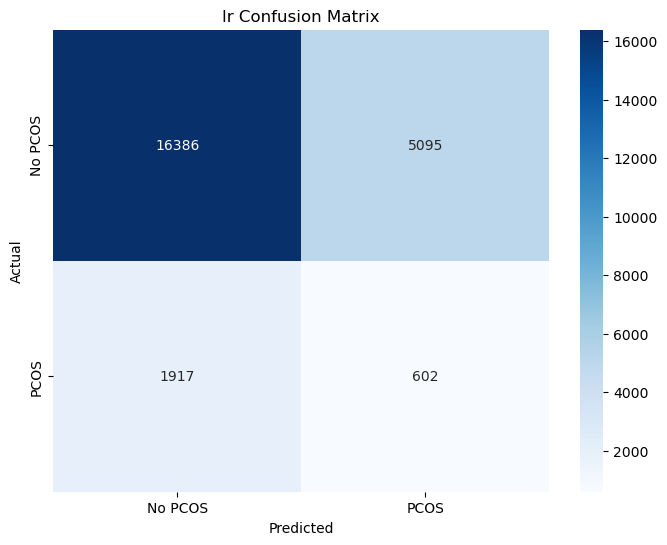

In [206]:
# Step 12: Visualize Confusion Matrices
for model_name, model in [('Random Forest', rf_model), ('SGD SVM', svm_model), ('KNN', knn_model),
                          ('Naive Bayes', nb_model), ('MLP', mlp_model), ('XGBoost', xgb_model),
                          ('LightGBM', lgbm_model), ('Stacking', stacking_model),('lr', lr_model)]:
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f"{model_name} Confusion Matrix")

In [207]:
import joblib

# Save trained model
joblib.dump(model, "pcos_model.pkl")

# Save the scaler used for feature transformation
joblib.dump(scaler, "scaler.pkl")

# Save feature names to ensure correct input order in Streamlit
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

print("Model, scaler, and feature names saved successfully!")


Model, scaler, and feature names saved successfully!


In [271]:
from collections import Counter
print("y_test distribution:", Counter(y_test))


y_test distribution: Counter({0: 21481, 1: 2519})
